In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-06T00:36:31.864370+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4549858570098877}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0037169456481933594}
!!! {"init_...": 0.0006124973297119141}
!!! {"ete3Tree": 0.367189884185791}
!!! {"GenomeTree_hierarchical": 0.3012204170227051}
!!! {"mutateBranchETEhierarchy": 0.08741211891174316}
!!! {"write_genome_short": 0.04286074638366699}


  4%|▍         | 8/193 [00:03<00:51,  3.61it/s]

!!! {"writeGenomeNoIndels": 0.1611332893371582}
!!! {"pl.DataFrame": 0.04236435890197754}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0115902423858643}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01688075065612793}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003218412399291992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012969970703125}
!!! {"init_...": 0.0004551410675048828}
!!! {"ete3Tree": 7.605552673339844e-05}
!!! {"GenomeTree_hierarchical": 0.002051830291748047}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 6.818771362304688e-05}

  7%|▋         | 14/193 [00:03<00:25,  7.13it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.384185791015625e-05}
len(phylogeny_df)=166, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00357818603515625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.036064147949219e-05}
!!! {"init_...": 0.0004036426544189453}
!!! {"ete3Tree": 0.0010721683502197266}
!!! {"GenomeTree_hierarchical": 0.0019464492797851562}
!!! {"mutateBranchETEhierarchy": 0.00021266937255859375}
!!! {"write_genome_short": 0.0001723766326904297}
!!! {"writeGenomeNoIndels": 0.0003809928894042969}
!!! {"pl.DataFrame": 0.0001289844512939453}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005826711654663086}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000195

 13%|█▎        | 26/193 [00:03<00:10, 15.52it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04049038887023926}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010714530944824219}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031397342681884766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010657310485839844}
!!! {"init_...": 0.0004487037658691406}
!!! {"ete3Tree": 6.198883056640625e-05}
!!! {"GenomeTree_hierarchical": 0.0020380020141601562}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 6.842613220214844e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.699562

 21%|██        | 40/193 [00:03<00:05, 28.33it/s]

!!! {"write_genome_short": 0.0004987716674804688}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 9.131431579589844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005002260208129883}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001957416534423828}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=1628, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005578279495239258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010013580322265625}
!!! {"init_...": 0.0004215240478515625}
!!! {"ete3Tree": 0.010298490524291992}
!!! {"GenomeTree_hierarchical": 0.001987457275390625}
!!! {"mutateBranchETEhierarchy": 0.0021

 27%|██▋       | 53/193 [00:03<00:03, 38.33it/s]

!!! {"writeGenomeNoIndels": 0.008309602737426758}
!!! {"pl.DataFrame": 0.0015981197357177734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04112505912780762}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010595321655273438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5497207641601562e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.002961397171020508}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010561943054199219}
!!! {"init_...": 0.0004458427429199219}
!!! {"ete3Tree": 6.198883056640625e-05}
!!! {"GenomeTree_hierarchical": 0.0020568370819091797}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 6.69956207

 35%|███▍      | 67/193 [00:04<00:02, 49.72it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030074119567871094}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.226799011230469e-05}
!!! {"init_...": 0.00037932395935058594}
!!! {"ete3Tree": 5.245208740234375e-05}
!!! {"GenomeTree_hierarchical": 0.0025365352630615234}
!!! {"mutateBranchETEhierarchy": 8.58306884765625e-06}
!!! {"write_genome_short": 6.532669067382812e-05}
!!! {"writeGenomeNoIndels": 5.7220458984375e-06}
!!! {"pl.DataFrame": 6.079673767089844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004680633544921875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00016617

 38%|███▊      | 74/193 [00:04<00:02, 53.26it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030393600463867188}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.512901306152344e-05}
!!! {"init_...": 0.0003802776336669922}
!!! {"ete3Tree": 5.340576171875e-05}
!!! {"GenomeTree_hierarchical": 0.001924276351928711}
!!! {"mutateBranchETEhierarchy": 8.821487426757812e-06}
!!! {"write_genome_short": 5.91278076171875e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.0558319091796875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004168987274169922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001583099

 42%|████▏     | 81/193 [00:04<00:02, 46.90it/s]

!!! {"phastSimRun": 0.00010061264038085938}
!!! {"init_...": 0.0005750656127929688}
!!! {"ete3Tree": 0.00018739700317382812}
!!! {"GenomeTree_hierarchical": 0.0020966529846191406}
!!! {"mutateBranchETEhierarchy": 3.504753112792969e-05}
!!! {"write_genome_short": 0.00010347366333007812}
!!! {"writeGenomeNoIndels": 7.224082946777344e-05}
!!! {"pl.DataFrame": 7.104873657226562e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0051898956298828125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001575946807861328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3468, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00833439826965332}
enter log_context_duration fo

 48%|████▊     | 93/193 [00:04<00:02, 44.31it/s]

!!! {"write_genome_short": 0.0004096031188964844}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 6.794929504394531e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00462794303894043}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017976760864257812}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030634403228759766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010013580322265625}
!!! {"init_...": 0.00042366981506347656}
!!! {"ete3Tree": 5.817413330078125e-05}
!!! {"GenomeTree_hierarchical": 0.0019402503967285156}
!!! {"mutateBranchETEhierarchy": 9.05990

 54%|█████▍    | 105/193 [00:04<00:01, 48.13it/s]

!!! {"phastSimRun": 9.441375732421875e-05}
!!! {"init_...": 0.00054168701171875}
!!! {"ete3Tree": 7.271766662597656e-05}
!!! {"GenomeTree_hierarchical": 0.002025127410888672}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 7.081031799316406e-05}
!!! {"writeGenomeNoIndels": 1.2636184692382812e-05}
!!! {"pl.DataFrame": 6.651878356933594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004688739776611328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00016641616821289062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0029935836791992188}
enter log_context_duration for _d

 61%|██████    | 117/193 [00:05<00:01, 52.70it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=150, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035572052001953125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010085105895996094}
!!! {"init_...": 0.00041365623474121094}
!!! {"ete3Tree": 0.0010221004486083984}
!!! {"GenomeTree_hierarchical": 0.0019731521606445312}
!!! {"mutateBranchETEhierarchy": 0.00023627281188964844}
!!! {"write_genome_short": 0.00017189979553222656}
!!! {"writeGenomeNoIndels": 0.0003707408905029297}
!!! {"pl.DataFrame": 0.0001533031463623047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006068706512451172}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 67%|██████▋   | 129/193 [00:05<00:01, 54.63it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003256559371948242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010609626770019531}
!!! {"init_...": 0.00043654441833496094}
!!! {"ete3Tree": 6.580352783203125e-05}
!!! {"GenomeTree_hierarchical": 0.002086162567138672}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 6.890296936035156e-05}
!!! {"writeGenomeNoIndels": 1.4066696166992188e-05}
!!! {"pl.DataFrame": 7.295608520507812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0044367313385009766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

 74%|███████▍  | 143/193 [00:05<00:00, 59.43it/s]

!!! {"phastSimRun": 0.00010371208190917969}
!!! {"init_...": 0.0005457401275634766}
!!! {"ete3Tree": 5.91278076171875e-05}
!!! {"GenomeTree_hierarchical": 0.0020751953125}
!!! {"mutateBranchETEhierarchy": 9.5367431640625e-06}
!!! {"write_genome_short": 6.937980651855469e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.628036499023438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005277395248413086}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00016880035400390625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031173229217529297}
enter log_context_duration for _do_run_p

 77%|███████▋  | 149/193 [00:05<00:00, 45.10it/s]

!!! {"init_...": 0.0008807182312011719}
!!! {"ete3Tree": 7.081031799316406e-05}
!!! {"GenomeTree_hierarchical": 0.0020987987518310547}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 0.00024390220642089844}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.628036499023438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005012035369873047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001690387725830078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030868053436279297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000

 80%|████████  | 155/193 [00:05<00:00, 45.83it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032744407653808594}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010156631469726562}
!!! {"init_...": 0.0004343986511230469}
!!! {"ete3Tree": 8.034706115722656e-05}
!!! {"GenomeTree_hierarchical": 0.0024001598358154297}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 8.106231689453125e-05}
!!! {"writeGenomeNoIndels": 1.3589859008789062e-05}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004711151123046875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000

 83%|████████▎ | 160/193 [00:07<00:02, 11.35it/s]

!!! {"ete3Tree": 0.7708289623260498}
!!! {"GenomeTree_hierarchical": 0.0023026466369628906}
!!! {"mutateBranchETEhierarchy": 0.0464940071105957}
!!! {"write_genome_short": 0.023736238479614258}
!!! {"writeGenomeNoIndels": 0.0735175609588623}
!!! {"pl.DataFrame": 0.01381540298461914}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9337754249572754}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005991935729980469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032351016998291016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014019012451171875}
!!! {"init_...": 0.0004715919494628906}

 85%|████████▌ | 165/193 [00:07<00:01, 14.20it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003239870071411133}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.918212890625e-05}
!!! {"init_...": 0.0004267692565917969}
!!! {"ete3Tree": 5.7697296142578125e-05}
!!! {"GenomeTree_hierarchical": 0.002695798873901367}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 8.630752563476562e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.67572021484375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004920005798339844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001878738

 92%|█████████▏| 178/193 [00:07<00:00, 21.95it/s]

!!! {"ete3Tree": 0.06034111976623535}
!!! {"GenomeTree_hierarchical": 0.0018279552459716797}
!!! {"mutateBranchETEhierarchy": 0.015098333358764648}
!!! {"write_genome_short": 0.0071032047271728516}
!!! {"writeGenomeNoIndels": 0.024229049682617188}
!!! {"pl.DataFrame": 0.004573822021484375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.1154482364654541}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0023653507232666016}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031991004943847656}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013446807861328125}
!!! {"init_...": 0.000479698181

 97%|█████████▋| 188/193 [00:07<00:00, 27.54it/s]

!!! {"GenomeTree_hierarchical": 0.002884387969970703}
!!! {"mutateBranchETEhierarchy": 0.002092599868774414}
!!! {"write_genome_short": 0.0014257431030273438}
!!! {"writeGenomeNoIndels": 0.003588438034057617}
!!! {"pl.DataFrame": 0.0007560253143310547}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021330595016479492}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004756450653076172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030565261840820312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010156631469726562}
!!! {"init_...": 0.00044655799865722656}
!!! {"ete3Tree": 5.8174133

100%|██████████| 193/193 [00:08<00:00, 23.98it/s]


enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031027793884277344}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000102996826171875}
!!! {"init_...": 0.0004143714904785156}
!!! {"ete3Tree": 0.00017881393432617188}
!!! {"GenomeTree_hierarchical": 0.0019159317016601562}
!!! {"mutateBranchETEhierarchy": 3.647804260253906e-05}
!!! {"write_genome_short": 7.724761962890625e-05}
!!! {"writeGenomeNoIndels": 5.817413330078125e-05}
!!! {"pl.DataFrame": 7.295608520507812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004433155059814453}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000180

 43%|████▎     | 3/7 [00:00<00:00, 24.63it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002440929412841797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.032149314880371094}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0019228458404541016}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023984909057617188}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03116130828857422}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002473115921020508}
enter log_context_duration for se

100%|██████████| 7/7 [00:00<00:00, 25.61it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.0313410758972168}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035257339477539062}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0013484954833984375}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.019428730010986328}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002607583999633789}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.35194849967956543}
sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT

In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:24<00:00, 165.23it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.996058464050293}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 606.24it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 134.8633074760437}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.0666964054107666}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 195.5962951183319}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009303092956542969}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00033473968505859375}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003952980041503906}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003829002380371094}
ancestral_se


100%|██████████| 368/368 [00:00<00:00, 234148.04it/s]

process mutations:   0%|          | 1/368 [00:00<01:11,  5.13it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:14,  2.37s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.0s



process mutations:  13%|█▎        | 48/368 [01:09<07:27,  1.40s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:02<06:20,  1.36s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  35%|███▍      | 128/368 [02:55<05:24,  1.35s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  46%|████▌     | 168/368 [03:48<04:28,  1.34s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.2min



process mutations:  57%|█████▋    | 208/368 [04:39<03:31,  1.32s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.1min



process mutations:  67%|██████▋   | 248/368 [05:31<02:36,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.1min



process mutations:  78%|███████▊  | 288/368 [06:30<01:49,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.0min



process mutations:  89%|████████▉ | 328/368 [07:21<00:53,  1.33s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.9min



process mutations: 100%|██████████| 368/368 [08:14<00:00,  1.34s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.2min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.6min finished


process replicate: 100%|██████████| 1/1 [11:58<00:00, 718.21s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09904837608337402}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '5c94002d-2c89-8d32-a0e6-f91a5b74157e', '5c94002d-2c89-8d32-a0e6-f91a5b74157e', '5c94002d-2c89-8d32-a0e6-f91a5b
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


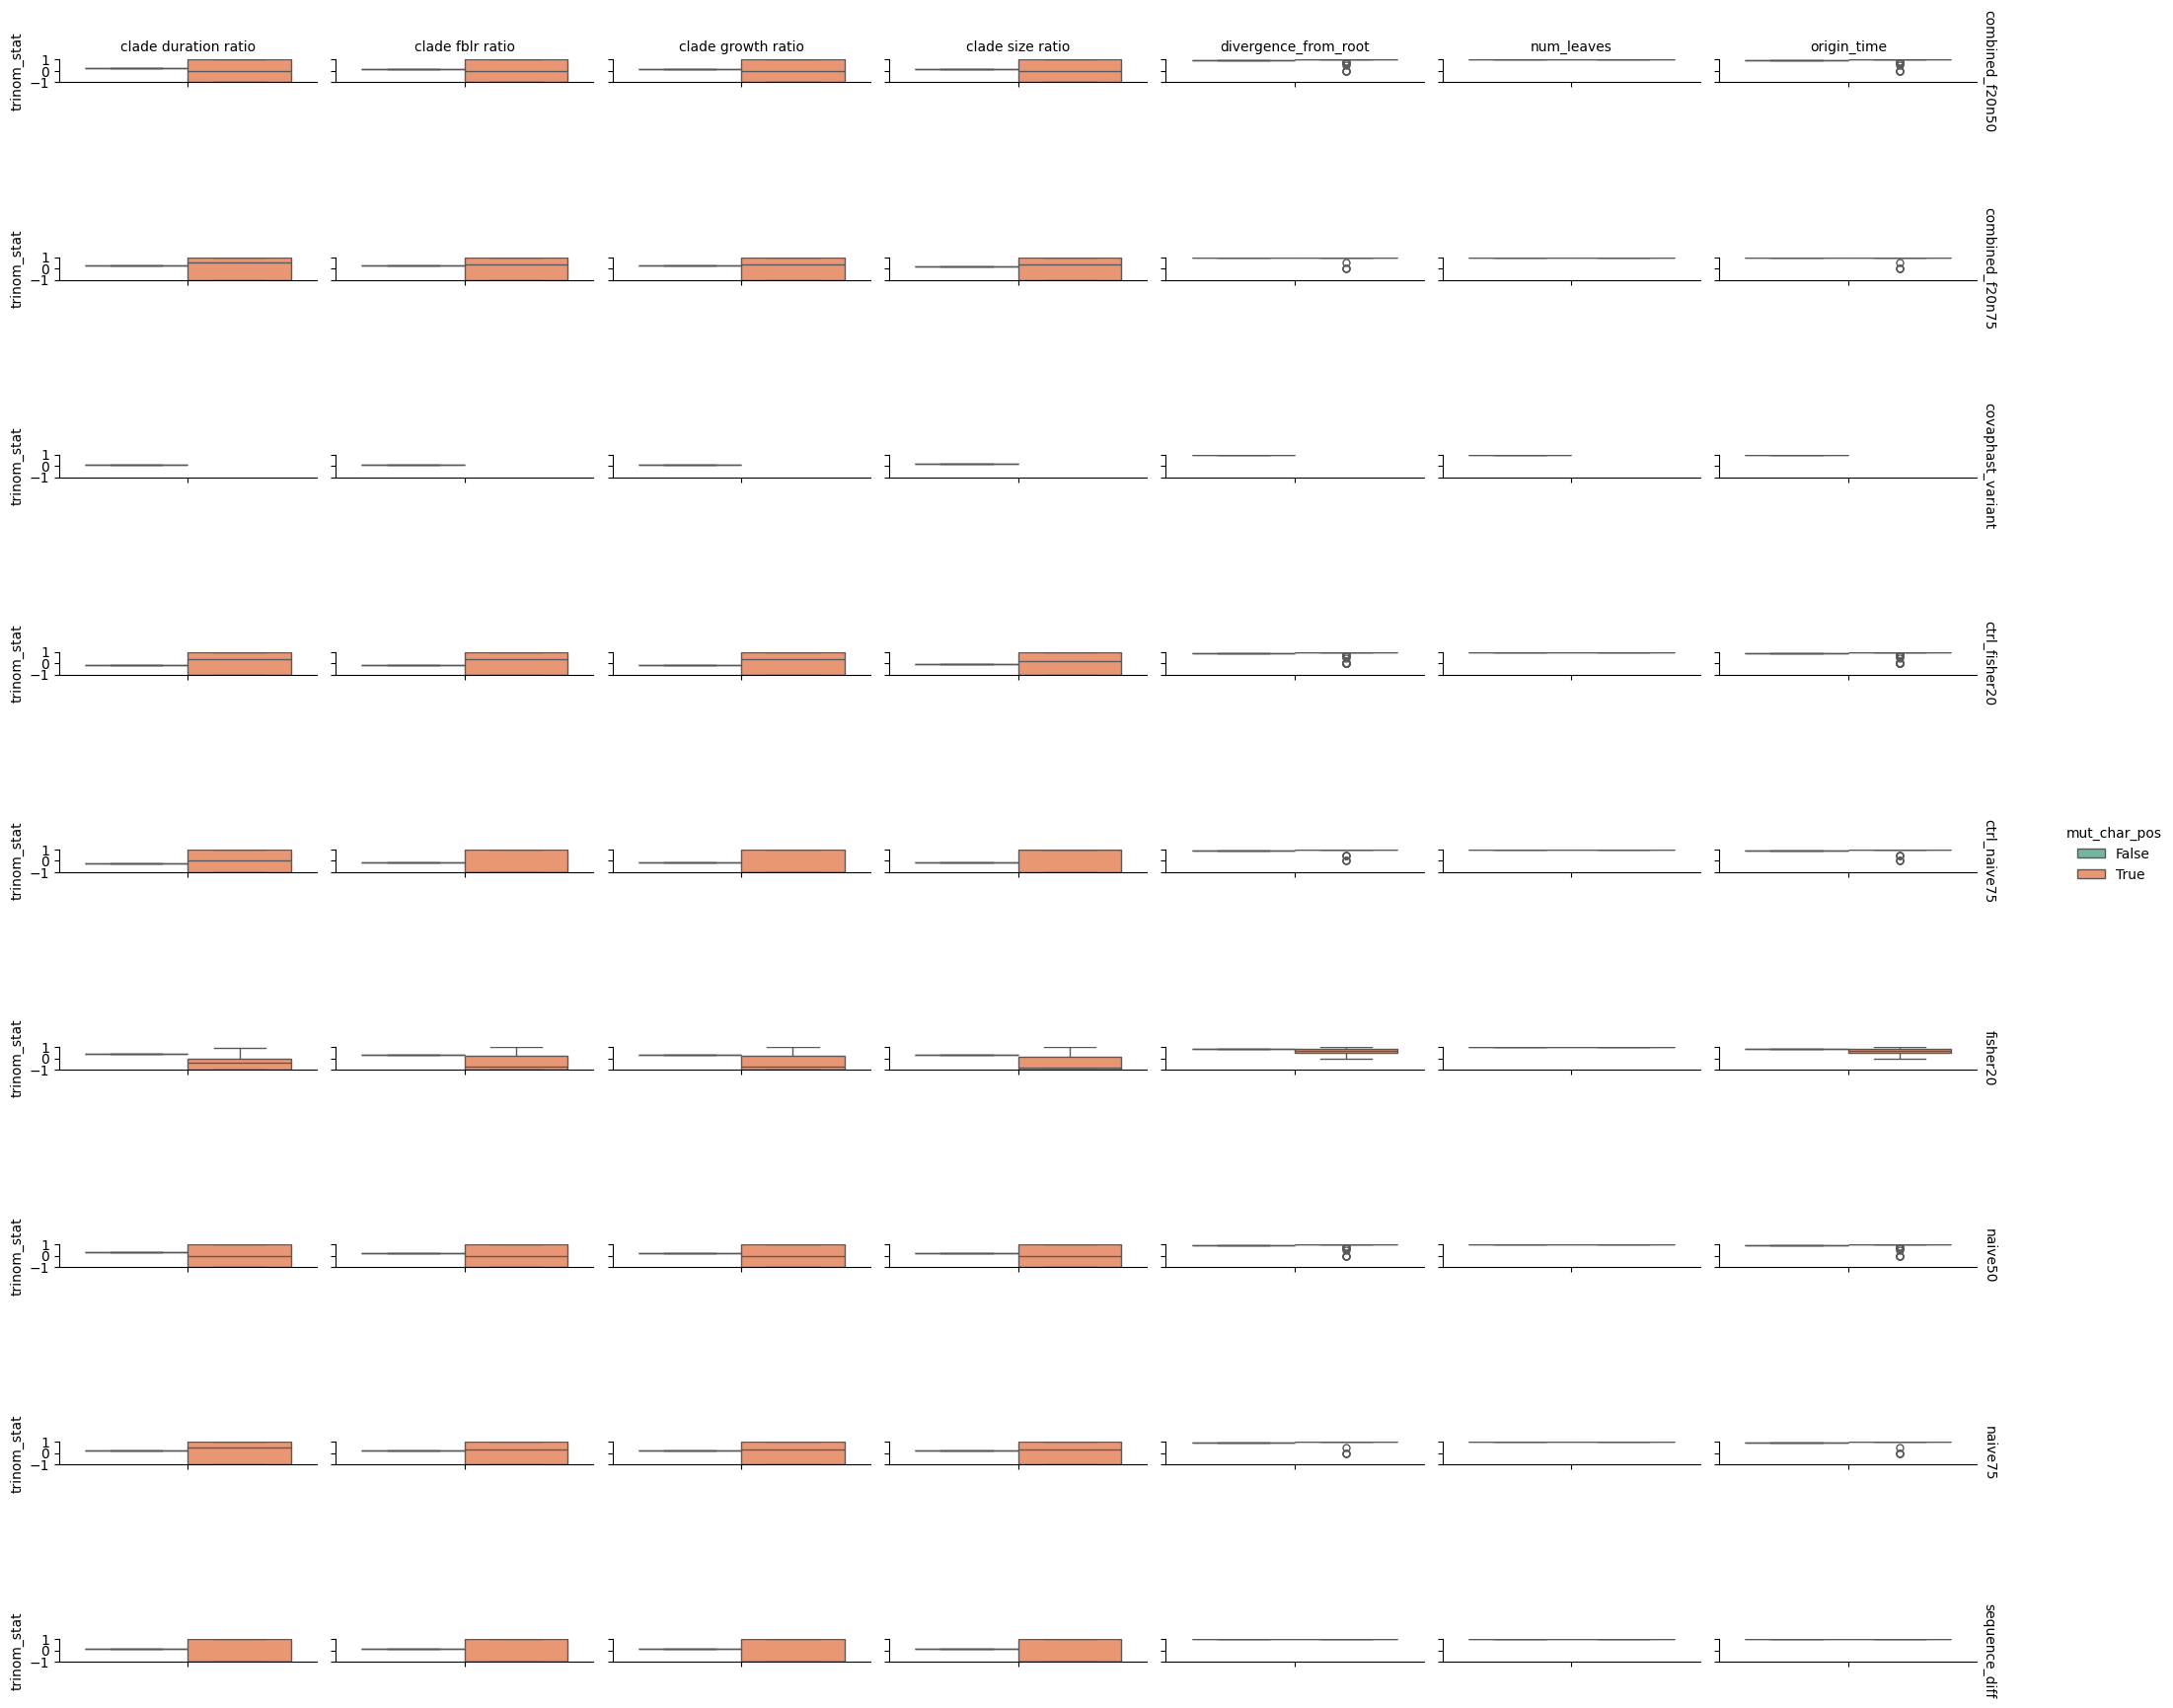

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


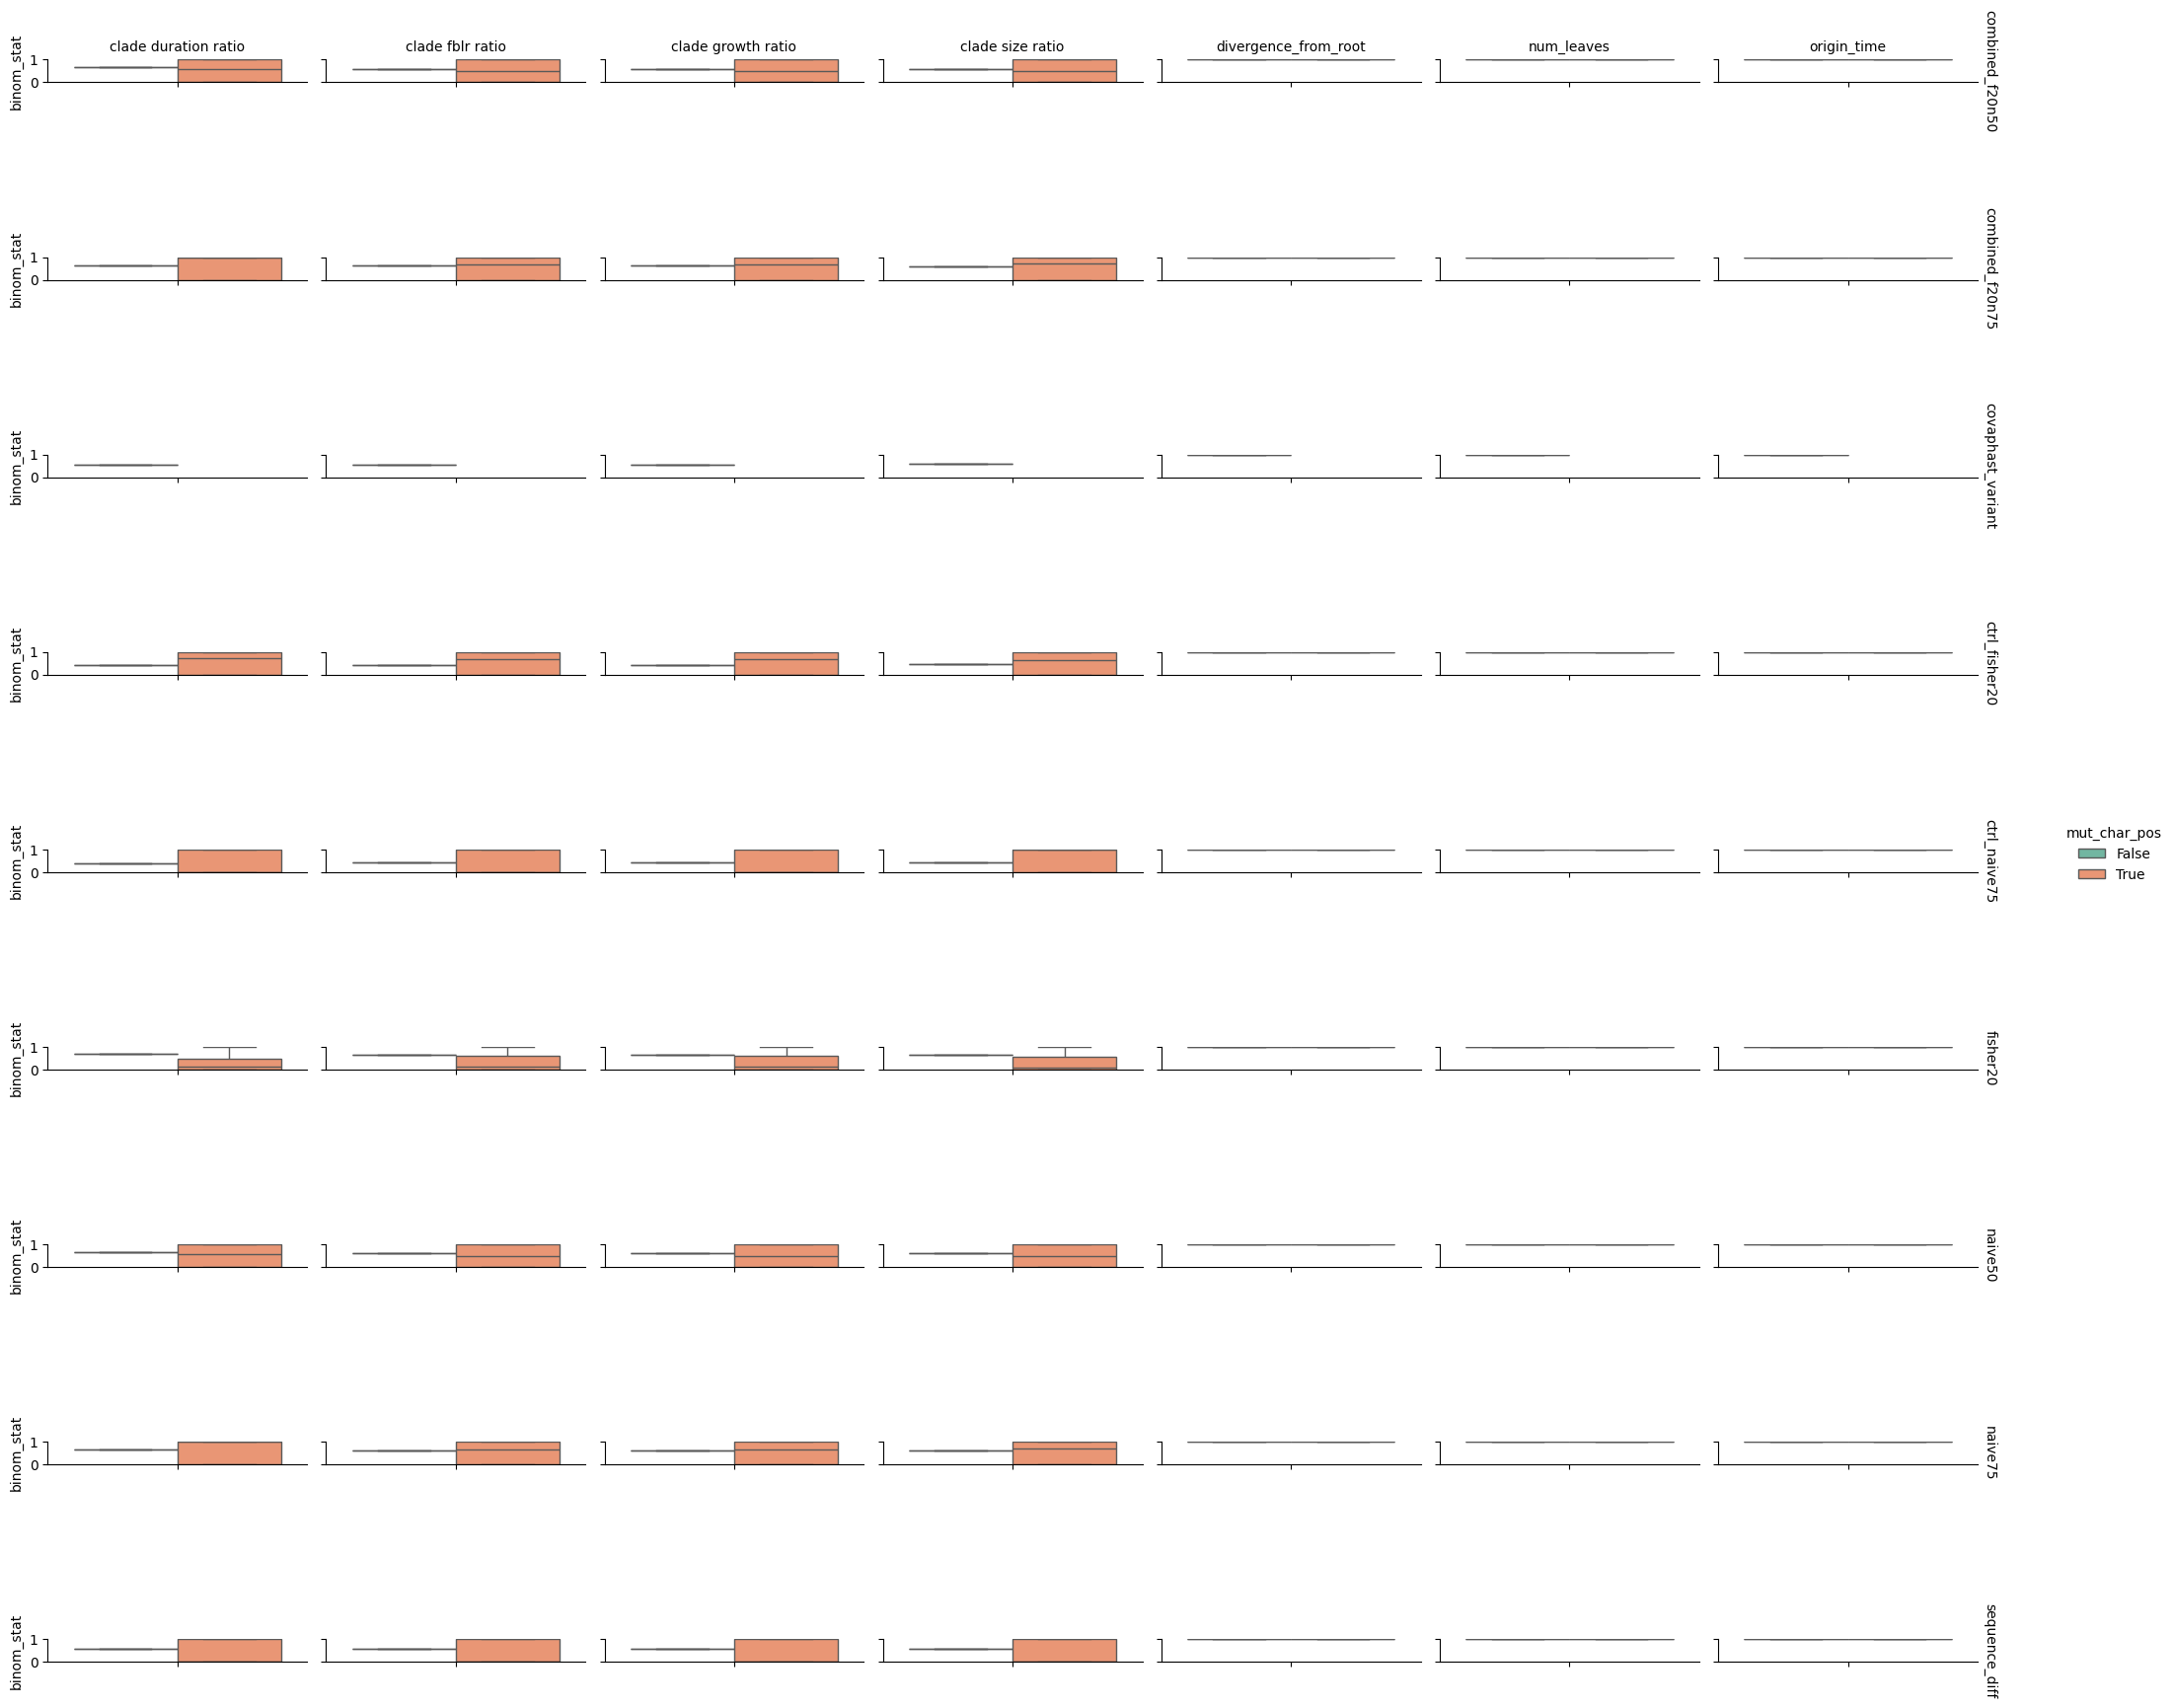

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


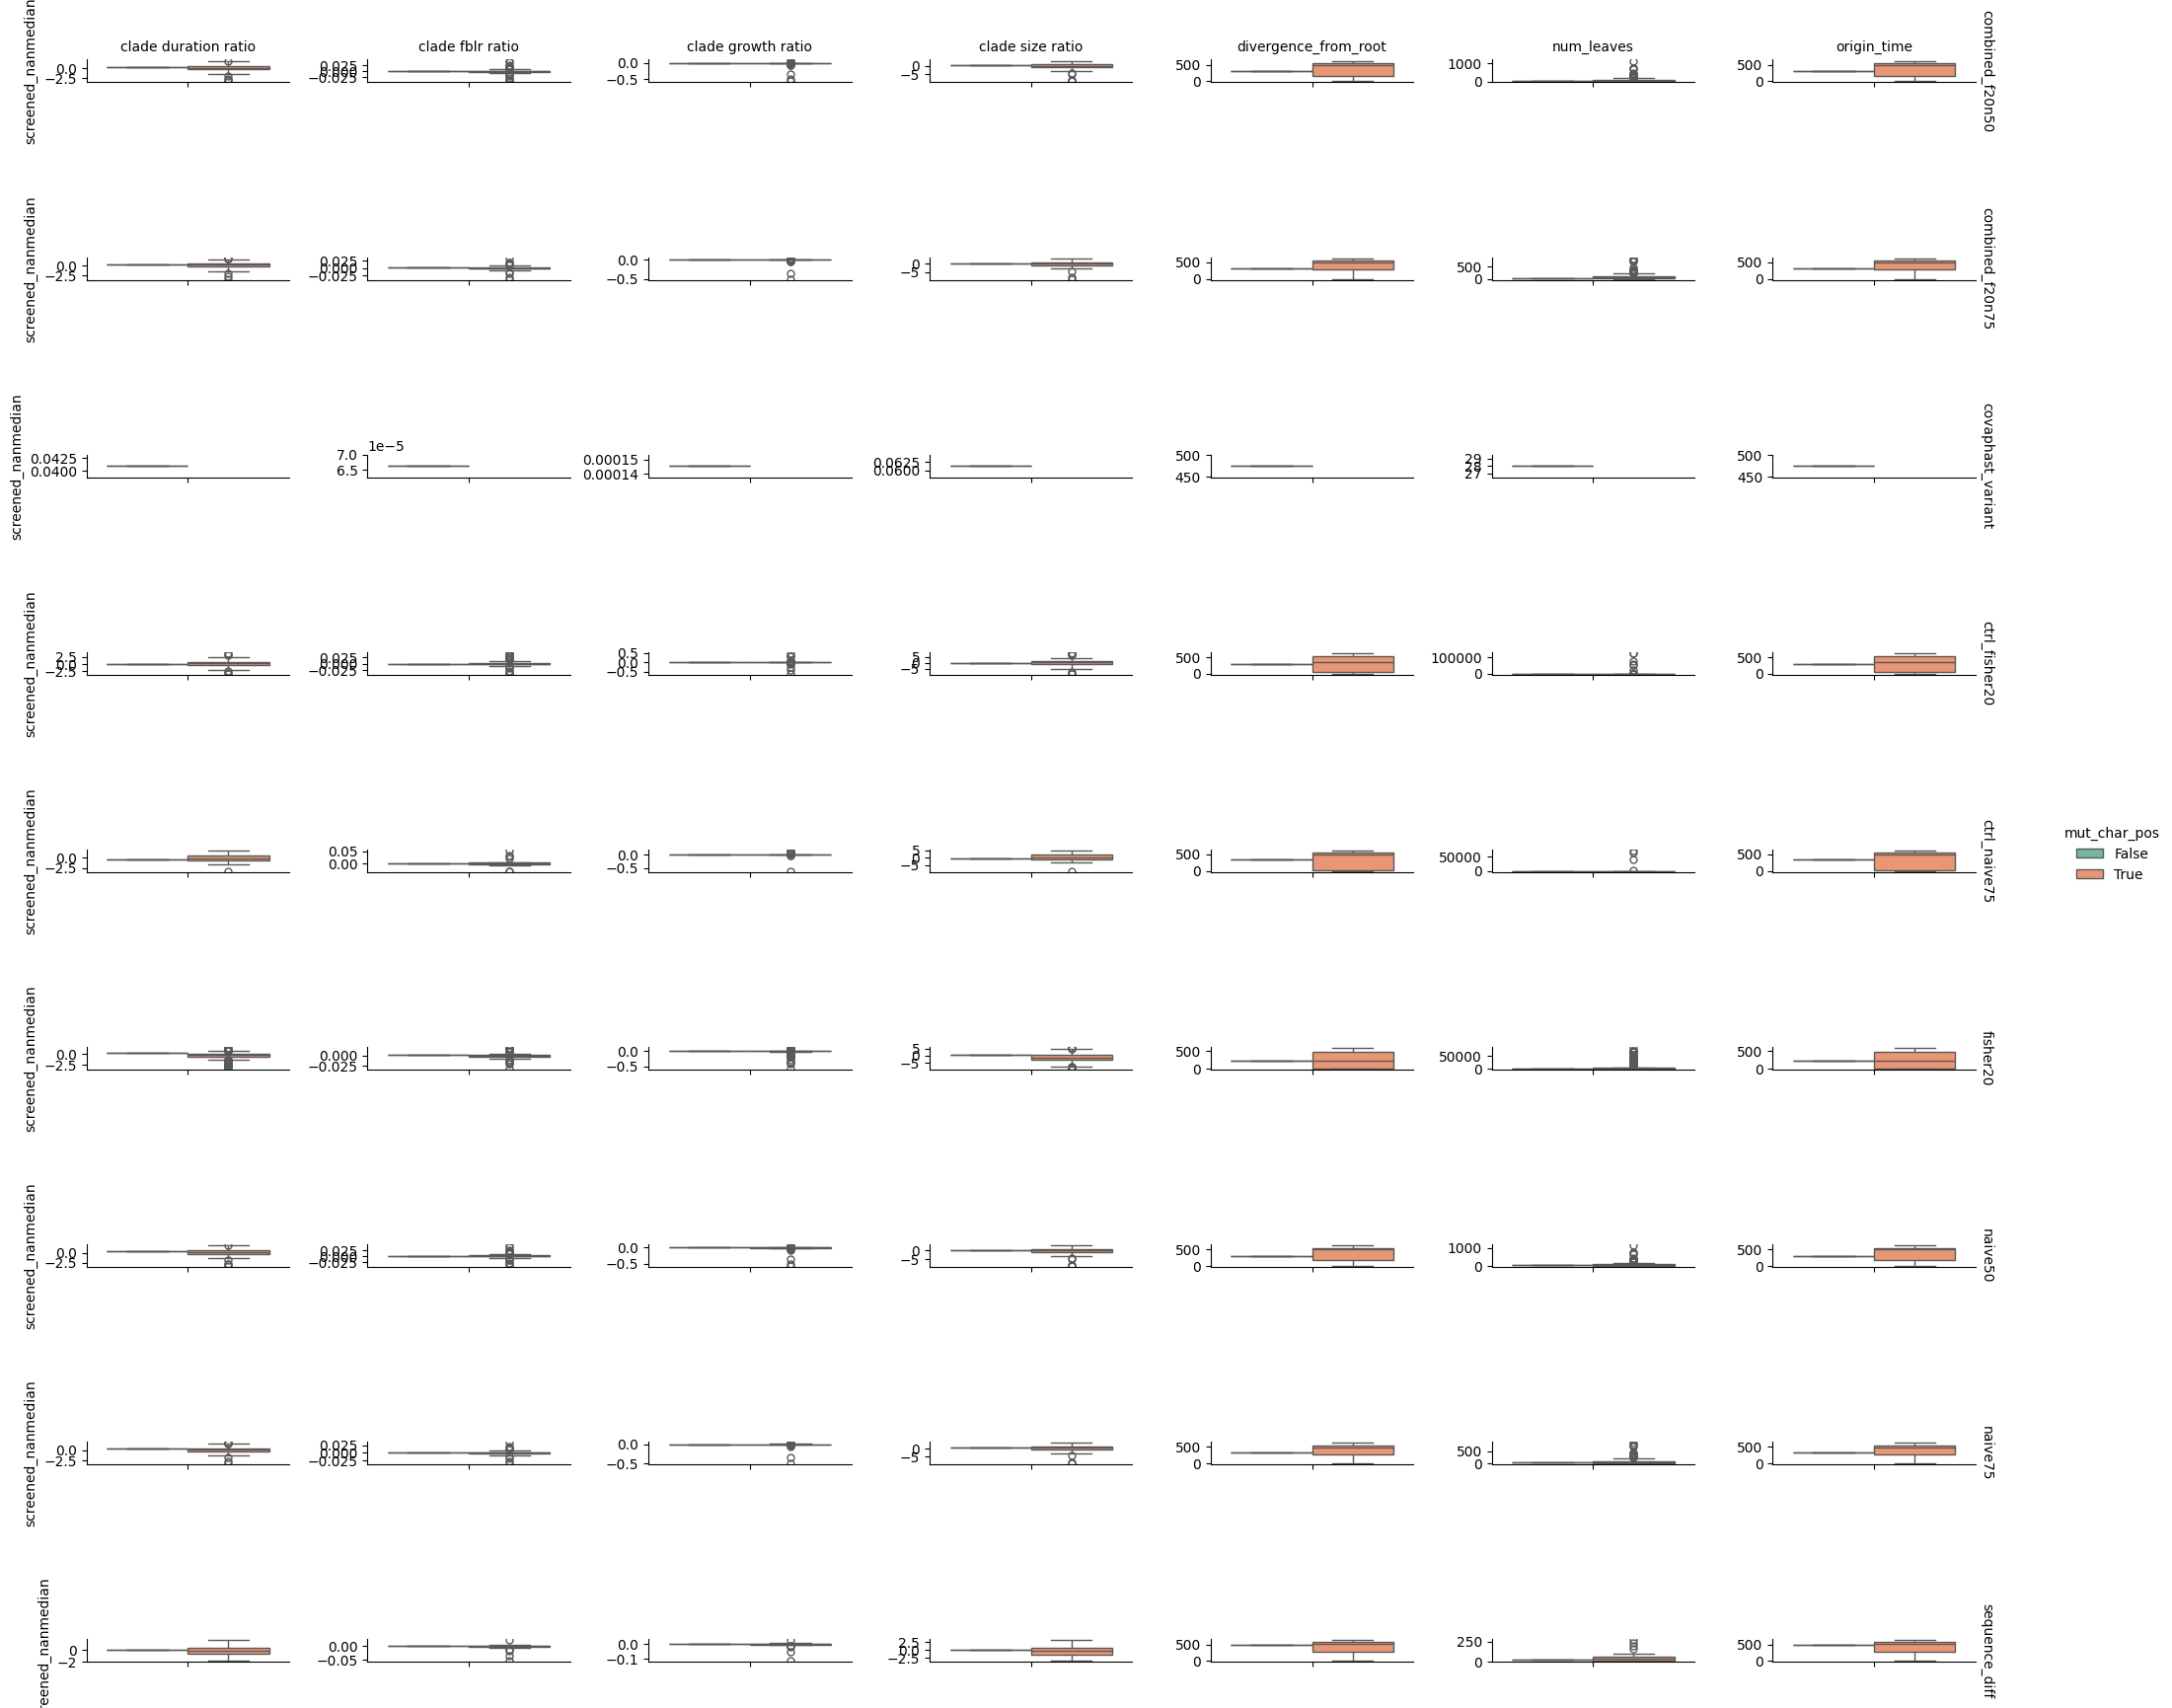

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


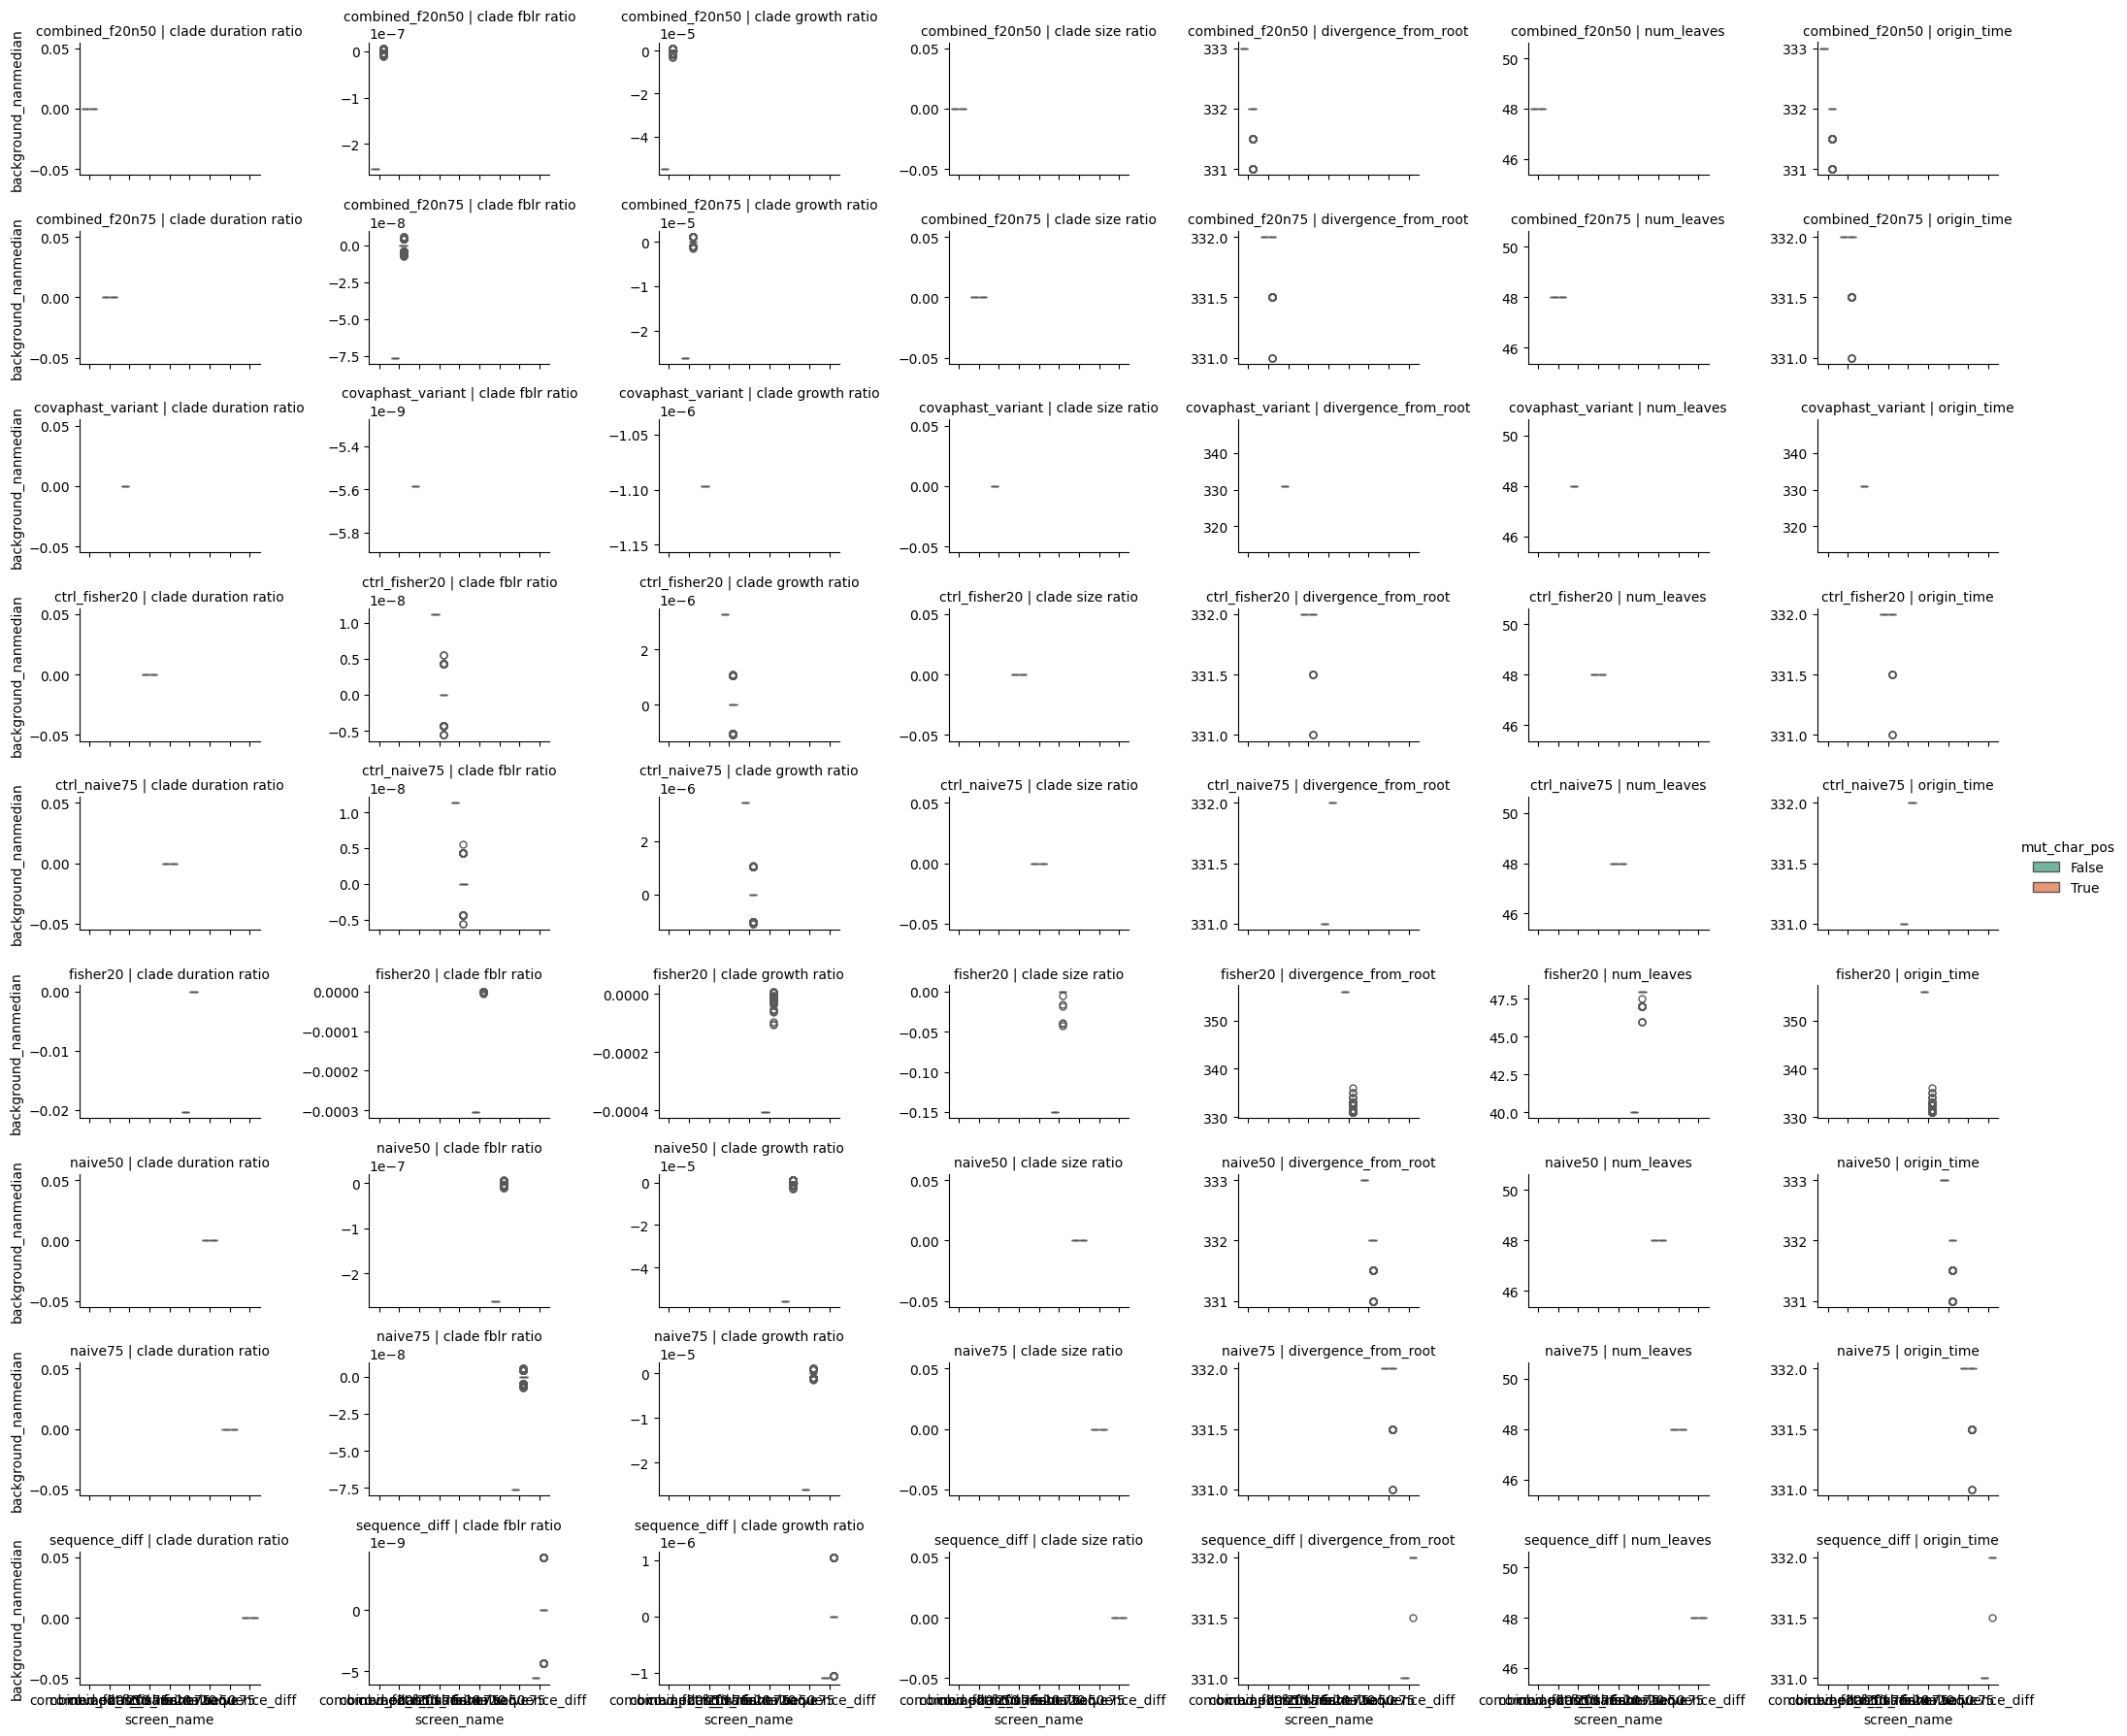

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
